In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



In [2]:
df=pd.read_csv("income.csv")

In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


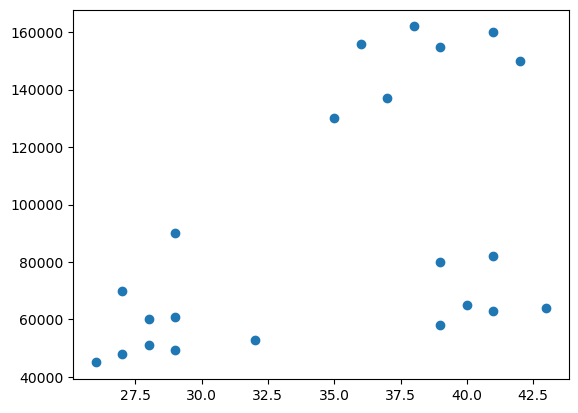

In [4]:
plt.scatter(x="Age",y="Income($)",data=df)

In [5]:
x=df[['Age','Income($)']]

In [6]:
x

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [7]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=42)
df['cluster']=model.fit_predict(x)

In [8]:
df['cluster']

0     1
1     2
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    2
20    2
21    1
Name: cluster, dtype: int32

In [9]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

# So [:, 0] means “take all the rows, but only the first column.”

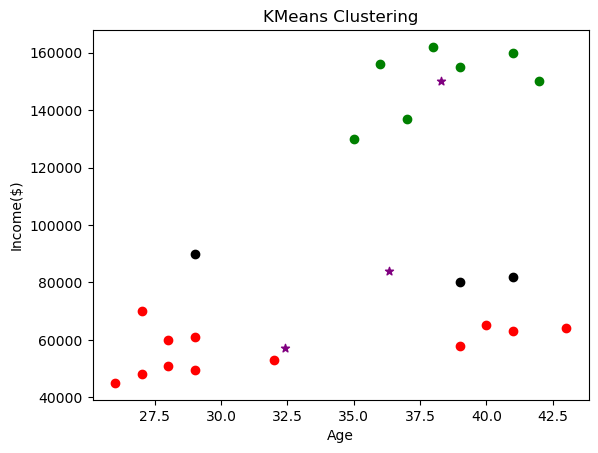

In [10]:
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
# this line for  centroid
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('KMeans Clustering')
plt.show()

# we not getting proper cluster so we use preprocessing method using MinMaxscaling then we gett proper cluster

In [11]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df
                    

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [12]:
model=KMeans(n_clusters=3)
df['cluster']=model.fit_predict(df[['Age','Income($)']])

In [13]:
df['cluster']
#df.drop('cluster',axis='columns',inplace=True)
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


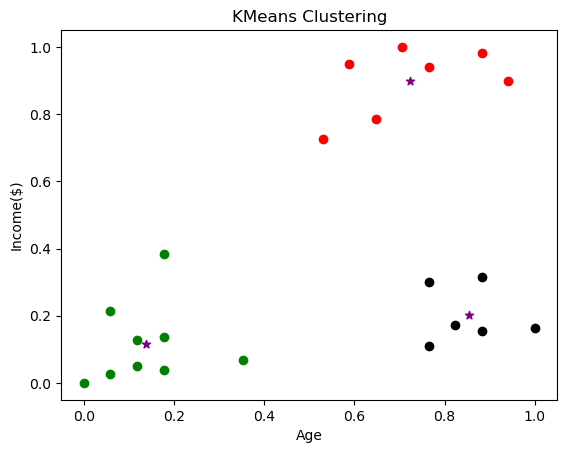

In [14]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
# this line for  centroid
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('KMeans Clustering')
plt.show()

# elbow technique to find k

In [15]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)#inertia give sum of square error

In [16]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.3510596000355858,
 0.22020960864009395,
 0.20009893950833835,
 0.15205897076959982,
 0.10497488680620906]

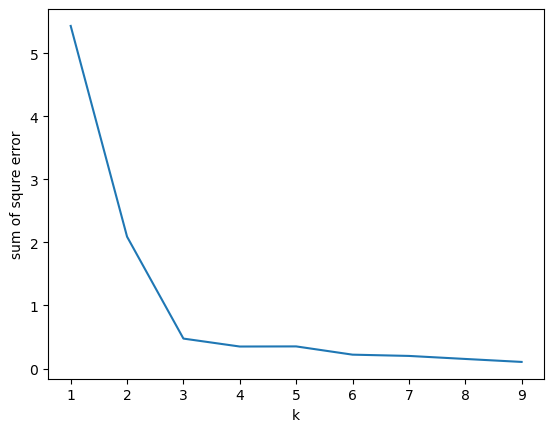

In [18]:
plt.xlabel('k')
plt.ylabel('sum of squre error')
plt.plot(k_rng,sse)

# so k is 3